# <center>AWS OBJECT DETECTION PROJECT</center>

# 1 - EDA and Visualization

This is the first notebbok from the capstone project for the AWS Machine Learning Nanodegree from Udacity. 


In this notebook we will:

- Extract the data from zip folders
- Load datasets
- Count images
- Extract ids from folders
- Filter images by the class we are going to work with
- Generate vizualizations of images with and without bounding boxes

**Firstly we are goint to import the functions we will need to complete our fist tasks**

In [1]:
# to extract the data from folders
from utils.data_eda_viz_preprocessing import extract_zip_to_folder

# to process and configurate and clean the data
import pandas as pd
import random
from utils.data_eda_viz_preprocessing import load_csv_as_dataset
from utils.data_eda_viz_preprocessing import count_images
from utils.data_eda_viz_preprocessing import extract_id_from_path
from utils.data_eda_viz_preprocessing import filter_df_by_class
from utils.data_eda_viz_preprocessing import filter_dataset

# to visualize data
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from utils.data_eda_viz_preprocessing import visualize_random_image
from utils.data_eda_viz_preprocessing import visualize_many
from utils.data_eda_viz_preprocessing import visualize_single_bbox
from utils.data_eda_viz_preprocessing import visualize_bb_with_data

# to move data from/to folders
import os
import glob

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Data Extraction and Exploration

We will extract our data from the zip folders. Our images are divided in 2 zip folders calles <code>trainImages.zip</code> and <code>validationImages.zip</code> in our directory. We will generate with our functions a new folder called <code>unzipped</code> with our data.

In [2]:
zip_files = ["trainImages.zip", "validationImages.zip"]

extract_zip_to_folder(zip_files)

Processing trainImages.zip...
trainImages.zip completed!
Processing validationImages.zip...
validationImages.zip completed!


Our new <code>unzipped</code> folder is composed by 2 folders (*trainImages* and *validationImages*). Each is composed by 3 folders:

- **Data:** containing the images
- **Labels:** containing a csv called *detections* that contains the image id and the coordinates of the bounding boxes and extra information such Label of the bounding boxes, etc.
- **Metadata:** containing classes (definition of the labels), hierarchy and an image_ids csv.

Now we can load our label datasets for <code>train</code> and <code>validation</code> with the information of our images.

In [3]:
df_train = load_csv_as_dataset("unzipped/trainImages/train/labels/detections.csv")
df_train.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,...,0,0,0.148438,0.012500,0.059375,0.195312,0.148438,0.357812,0.587500,0.325000
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,...,0,0,0.025000,0.248438,0.276563,0.214062,0.914062,0.714063,0.782813,0.948438
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,...,0,0,0.243750,0.151562,0.310937,0.262500,0.198437,0.434375,0.507812,0.590625
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,...,0,0,0.315625,0.429688,0.256250,0.423438,0.651563,0.921875,0.826562,0.925000
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,...,0,0,0.317188,0.257812,0.346875,0.307812,0.235938,0.289062,0.348438,0.385938


In [4]:
df_validation = load_csv_as_dataset("unzipped/validationImages/validation/labels/detections.csv")
df_validation.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,0001eeaf4aed83f9,xclick,/m/0cmf2,1,0.022673,0.964201,0.071038,0.800546,0,0,0,0,0
1,000595fe6fee6369,xclick,/m/02wbm,1,0.000000,1.000000,0.000000,1.000000,0,0,1,0,0
2,000595fe6fee6369,xclick,/m/02xwb,1,0.141384,0.179676,0.676275,0.731707,0,0,0,0,0
3,000595fe6fee6369,xclick,/m/02xwb,1,0.213549,0.253314,0.299335,0.354767,1,0,0,0,0
4,000595fe6fee6369,xclick,/m/02xwb,1,0.232695,0.288660,0.490022,0.545455,1,0,0,0,0


In [5]:
df_train.shape, df_validation.shape

((14610229, 21), (303980, 13))

As we can see, our <code>detections</code> datasets contain information of all the images we have unzipped. At this early stage we will use 6 columns:

- **ImageID** in order to use the image we need
- **LabelName** in order to identify the class we want, in this case the class o label "Airplane"
- **Xmin, Ymin, Xmax, Ymax** (aka left, top, right, bottom) columns that point the normalized coordinates of the bounding boxes in proportional format.

Now we are going to count how many images we have in both folders:

In [6]:
data_path_train = "unzipped/trainImages/train/data/*.jpg"
data_path_validation = "unzipped/validationImages/validation/data/*.jpg"

train_count = count_images(data_path_train)
validation_count = count_images(data_path_validation)

print(f"Count of training images: {train_count}")
print(f"Count of validation images: {validation_count}")

Count of training images: 900
Count of validation images: 250


We have **900** images in our training folder and **250** in our validation folder

Now we are going to extract the IDs from the images in our folders. Since the name of the images contain the ID's, we are going to use their basename in order to extract them and stored in a list for train and validation.

In order to to this, let's diplay a random image names from both folders:

In [7]:
# Names for train
train_files_images = glob.glob("unzipped/trainImages/train/data/*.jpg")

print(*train_files_images[:1])

unzipped/trainImages/train/data/03b103fbc1c5fecc.jpg


In [8]:
# Names for validation
validation_files_images = glob.glob("unzipped/validationImages/validation/data/*.jpg")

print(*validation_files_images[:1], sep='\n')

unzipped/validationImages/validation/data/3ec661030be3d248.jpg


As the basename of eachpath corresponds to the ImageID, we will extract them using our function <code>extract_id_from_path</code> that uses the method <code>basename</code> from <code>os</code> module.

In [9]:
train_ids = [extract_id_from_path(file) for file in train_files_images]
validation_ids = [extract_id_from_path(file) for file in validation_files_images]


print(f"First 3 train IDs: {train_ids[:3]} and number of ID's: {len(train_ids)}")
print(f"\nFirst 3 validation IDs: {validation_ids[:3]} and number of ID's: {len(validation_ids)}")

First 3 train IDs: ['03b103fbc1c5fecc', '0323baa7b21bc27b', '001afd0dec437d9b'] and number of ID's: 900

First 3 validation IDs: ['3ec661030be3d248', '156581d5e0c80a63', '046ba24119dc2170'] and number of ID's: 250


Once we got our ImageID's now we will need to get our LabelName for our class. Since the CSV's we explored before contain several number of classes or labels, we will need to find our **"Airplane"** label. The lis of labels is located in our metadata folder

In [10]:
train_classes_df = pd.read_csv("unzipped/trainImages/train/metadata/classes.csv",
                               names=["className", "Object"])

validation_classes_df = pd.read_csv("unzipped/validationImages/validation/metadata/classes.csv",
                                    names=["className", "Object"])

In [11]:
# All Labels in Train 
train_classes_df.Object.nunique()

601

In [12]:
# All Labels in Validation
validation_classes_df .Object.nunique()

601

In [13]:
# Filtering the ID of our Class (Airplane) in both datasets
train_identifier = filter_df_by_class(train_classes_df, "Object","Airplane")
validation_identifier = filter_df_by_class(validation_classes_df, "Object","Airplane")


print(train_identifier)
print("--------------------")
print(validation_identifier)

    className    Object
467  /m/0cmf2  Airplane
--------------------
    className    Object
467  /m/0cmf2  Airplane


In [14]:
label_airplane = "/m/0cmf2"

Finally we found the name of our class: <code>**/m/0cmf2**</code>. That means that in the detections datasets we will need to filter the images that contain this label as it will be the images we need for our project. Let's filter our datasets:

In [15]:
TRAIN = df_train[df_train.LabelName == label_airplane]
VALIDATION = df_validation[df_validation.LabelName == label_airplane]

And now let's be sure that our images in the dataset are present in our folders and viceversa.

In [16]:
filtered_train = filter_dataset("unzipped/trainImages/train/data/", TRAIN)

Number of rows removed: 19595


In [17]:
filtered_validation = filter_dataset("unzipped/validationImages/validation/data/", VALIDATION)

Number of rows removed: 707


Now let's be sure we have the same number of images and unique Image Id's in our datasets

In [18]:
filtered_train.ImageID.nunique()

900

In [19]:
filtered_validation.ImageID.nunique()

250

Before visualizing some images, let's count the number of rows containing our label in train and validations datasets:

In [20]:
filtered_train[filtered_train.LabelName == label_airplane].shape

(1690, 21)

In [21]:
filtered_validation[filtered_validation.LabelName == label_airplane].shape

(325, 13)

Our folders contain:

- Train folder: 900 images
- Validation folder: 250 images


Our datasets contain:

- Train Dataset: 1690 rows
- Validation Dataset: 325 rows


We have more rows than images. The explanation is that we have in some images more than one airplane and the datasets contains the coordinates of the bounding boxes, so each row is a bounding box.

## Image Visualization

Before filtering and start working in our model, we are going to visualize some images, in order to start working with coordindates **XMin, XMax, YMin, YMax** and playaround with bounding boxes.

Let's start with visualizing a random image from our <code>train</code> images:

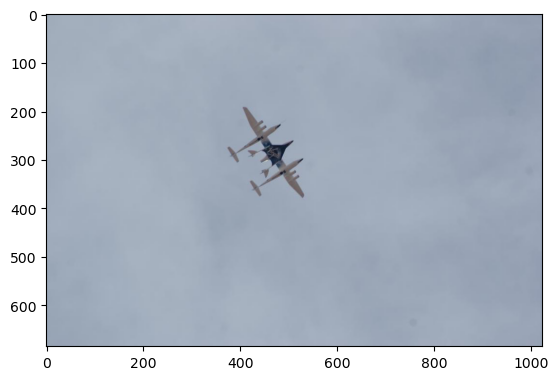

In [22]:
# Random image from trainImages
visualize_random_image("unzipped/trainImages/train/data/*.jpg")

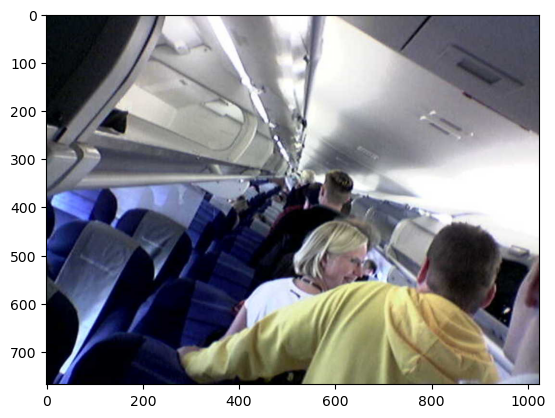

In [23]:
# Random image from validationImages
visualize_random_image("unzipped/validationImages/validation/data/*.jpg")

Let's now visualize multiple samples from the train folder:

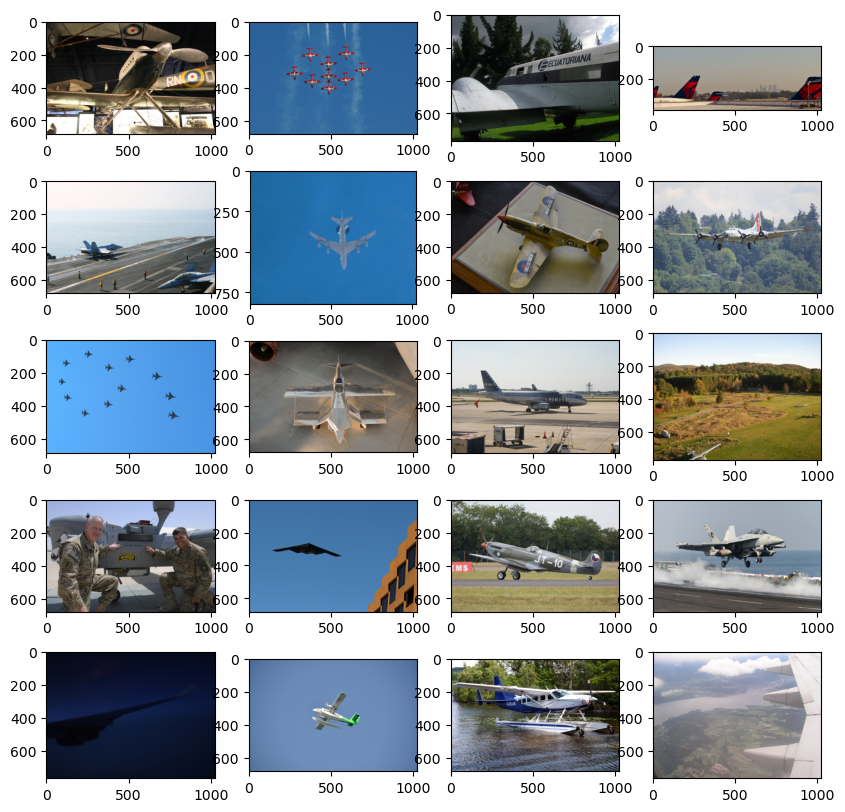

In [24]:
visualize_many(from_num=40, to_num=60, datasetpath="unzipped/trainImages/train/data/*.jpg")

Now some multiple samples from the validation folder:

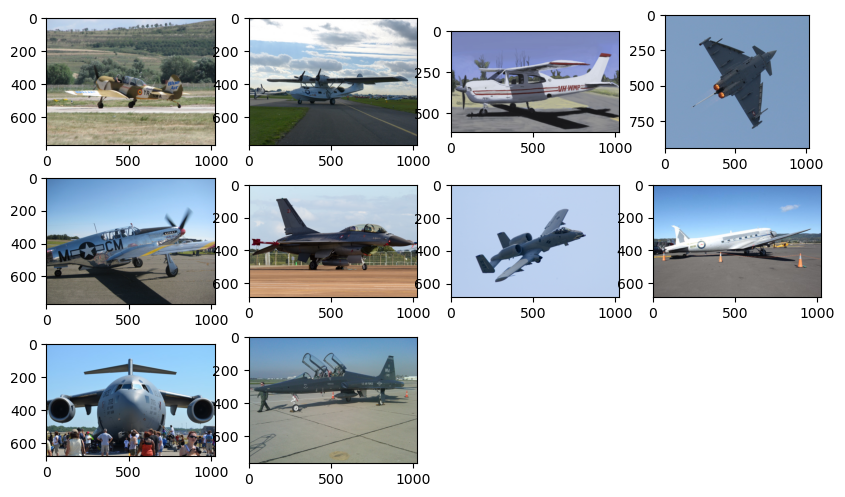

In [25]:
visualize_many(from_num=10, to_num=20, datasetpath="unzipped/validationImages/validation/data/*.jpg")

### Visualizing Single Bounding Boxes

Let's now visualize image using our **XMin, XMax, YMin, YMax** columns.

As we said, the columns **XMin, XMax, YMin, and YMax** represent normalized coordinates for an object's bounding box within an image. These values are in proportion format, ranging from 0 to 1. To plot the bounding box on the actual image, we convert these proportional coordinates into absolute pixel values by multiplying them with the image's dimensions.

The function <code>visualize_single_bbox</code> performs this conversion:

- It opens the image to determine its dimensions.
- Converts proportional coordinates to absolute pixel values.
- Draws the bounding box on the image.
- Displays the image with the overlaid bounding box.
- This approach aids in visualizing an object's exact location within an image.

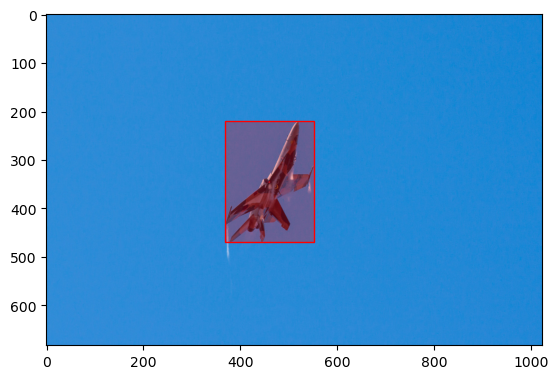

In [26]:
# Selecting a random image from train dataset

filtered_df = filtered_train[filtered_train['LabelName'] == label_airplane]

random_row = filtered_df.sample().iloc[0]

random_image_id = random_row['ImageID']
xmin = random_row['XMin']
xmax = random_row['XMax']
ymin = random_row['YMin']
ymax = random_row['YMax']

# Image path
image_directory = "unzipped/trainImages/train/data/"
image_filename = f"{random_image_id}.jpg"
image_path = os.path.join(image_directory, image_filename)

visualize_single_bbox(image_path, xmin, xmax, ymin, ymax)

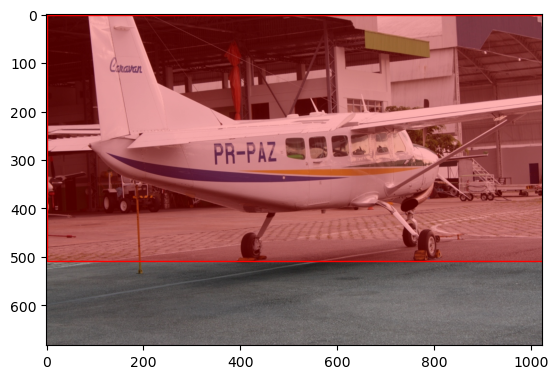

In [27]:
# Selecting a random image from validation dataset

filtered_df = filtered_validation[filtered_validation['LabelName'] == label_airplane]

random_row = filtered_df.sample().iloc[0]

random_image_id = random_row['ImageID']
xmin = random_row['XMin']
xmax = random_row['XMax']
ymin = random_row['YMin']
ymax = random_row['YMax']

# Image path
image_directory = "unzipped/validationImages/validation/data/"
image_filename = f"{random_image_id}.jpg"
image_path = os.path.join(image_directory, image_filename)

visualize_single_bbox(image_path, xmin, xmax, ymin, ymax)

### Visualizing Multiple Bounding Boxes

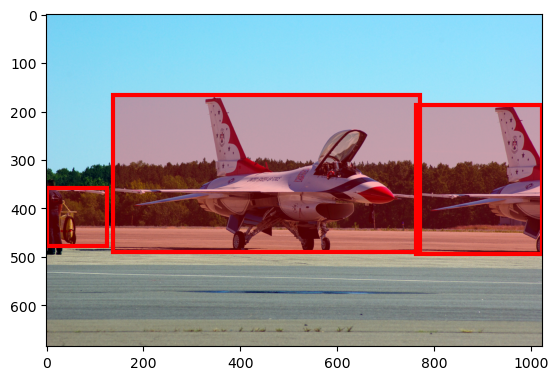

In [28]:
# From Train folder
visualize_bb_with_data("unzipped/trainImages/train/data/", df=filtered_train, target=label_airplane)

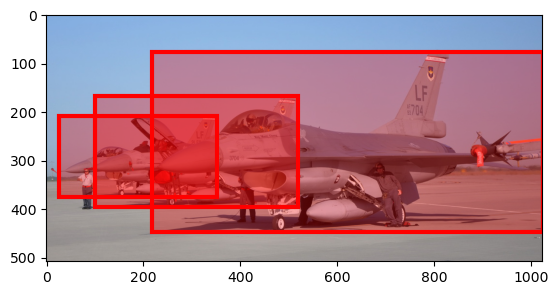

In [29]:
# From Validation folder
visualize_bb_with_data("unzipped/validationImages/validation/data/", df=filtered_validation, target=label_airplane)

In [30]:
# Saving datasets
filtered_train.to_csv("data/filtered_csv/train_filtered.csv")
filtered_validation.to_csv("data/filtered_csv/validation_filtered.csv")